## **Implementing SVM Algorithm in Python**
### Predict if cancer is Benign or malignant. Using historical data about patients diagnosed with cancer enables doctors to differentiate malignant cases and benign ones are given independent attributes.

In [1]:
# Load the relevant libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the breast cancer datasets
from sklearn.datasets import load_breast_cancer

# Import SVM and decision boundary display.
from sklearn.svm import SVC
from sklearn.inspection import DecisionBoundaryDisplay

# Import train test split and metrics.
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

In [4]:
# load the dataset into dataframe df.
df = load_breast_cancer()

# Create dataframe with columns name.
df = pd.DataFrame(np.c_[df['data'], df['target']], columns = np.append(df['feature_names'], ['target']))

df.head()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [5]:
# Split the data into X, y variable.
X = df.drop('target', axis = 1)
y = df['target']

In [6]:
# Split the data into training and testing part.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 5)

# Print the shape of the dataset.
print('Shape of X_train = ', X_train.shape)
print('Shape of y_train = ', y_train.shape)
print('Shape of X_test = ', X_test.shape)
print('Shape of y_test = ', y_test.shape)


Shape of X_train =  (455, 30)
Shape of y_train =  (455,)
Shape of X_test =  (114, 30)
Shape of y_test =  (114,)


In [9]:
# Build the model and train the model.
model = SVC(kernel = 'rbf', gamma = 0.5, C =1.0 )
model.fit(X_train, y_train)

SVC(gamma=0.5)

In [24]:
# Plot Decision Boundary
# Select only 'mean radius' and 'mean texture' for plotting the decision boundary
X_plot = X[['mean radius', 'mean texture']]
# Split the selected data into training and testing part.
X_train_plot, X_test_plot, y_train_plot, y_test_plot = train_test_split(X_plot, y, test_size = 0.2, random_state = 5)


In [25]:
# Build the model and train the model using the selected features.
model_plot = SVC(kernel = 'rbf', gamma = 0.5, C =1.0 )
model_plot.fit(X_train_plot, y_train_plot)


SVC(gamma=0.5)

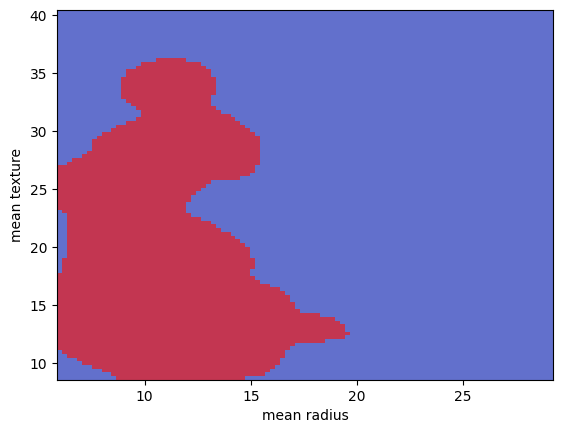

In [26]:
# Plot Decision Boundary
DecisionBoundaryDisplay.from_estimator(
    model_plot, # Use the model trained on selected features
    X_plot,  # Use the selected 2 features for plotting
    response_method="predict",
    cmap=plt.cm.coolwarm,
    alpha=0.8,
    xlabel= 'mean radius',  # Use string for label
    ylabel= 'mean texture',  # Use string for label
    plot_method="pcolormesh",
    shading="auto",
)

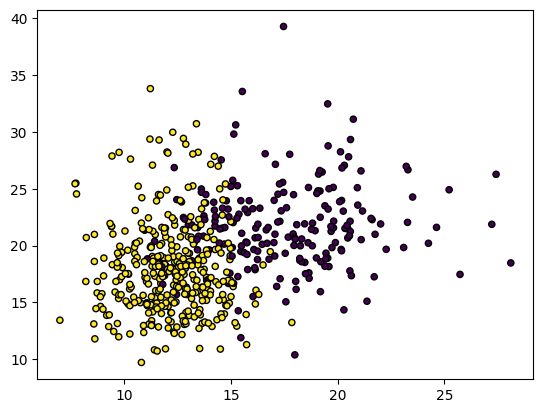

In [28]:
#Plot Scatter plot
plt.scatter(X_plot.iloc[:, 0], X_plot.iloc[:, 1],
            c=y,
            s=20, edgecolors="k")
plt.show()

In [29]:
# Make prediction on test data.
predictions = model.predict(X_test)


In [30]:
# Print accuracy, confusion_matrix and classification report of the model.
print('Accuracy: ', model.score(X_test, y_test))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

Accuracy:  0.5789473684210527
[[ 0 48]
 [ 0 66]]
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        48
         1.0       0.58      1.00      0.73        66

    accuracy                           0.58       114
   macro avg       0.29      0.50      0.37       114
weighted avg       0.34      0.58      0.42       114



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
